In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time

In [13]:
data = pd.read_csv("cleaned_data.csv") 

In [14]:
data.shape

(748211, 975)

In [15]:
#data = data.sample(n=300000)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748211 entries, 0 to 748210
Columns: 975 entries, mileage to personal_use_only_1.0
dtypes: float64(9), int64(966)
memory usage: 5.4 GB


In [17]:
print("Missing values in dataset:", data.isnull().sum().sum())

Missing values in dataset: 0


In [18]:
X = data.drop(columns=['price'])
y = data['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>KNN<h2>

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
model = KNeighborsRegressor(n_neighbors=100)

In [9]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [10]:
%%time

y_pred = model.predict(X_test)

CPU times: user 1h 59min 23s, sys: 1min 10s, total: 2h 33s
Wall time: 1h 56min 7s


In [11]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.8550571651201221


In [ ]:
df = pd.DataFrame({'y_test': y_test[:10], 'y_pred': y_pred[:10]})
print(df)

<h2>Linear Regression<h2>

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: -1.6427629737080624e+17


In [ ]:
df = pd.DataFrame({'y_test': y_test[:10], 'y_pred': y_pred[:10]})
print(df)

<h2> Decision Trees<h2>

In [17]:
from sklearn.tree import DecisionTreeRegressor


In [18]:
model = DecisionTreeRegressor(random_state=0)

In [19]:
%%time

model.fit(X_train, y_train)

CPU times: user 28.2 s, sys: 1.85 s, total: 30 s
Wall time: 30.7 s


DecisionTreeRegressor(random_state=0)

In [20]:
y_pred = model.predict(X_test)

In [21]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.8594775806034476


In [ ]:
df = pd.DataFrame({'y_test': y_test[:10], 'y_pred': y_pred[:10]})
print(df)

<h2>Random Forests<h2>

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model = RandomForestRegressor(n_estimators=40, random_state=0)

In [24]:
%%time

model.fit(X_train, y_train)

CPU times: user 11min 42s, sys: 2.97 s, total: 11min 45s
Wall time: 2h 11min 30s


RandomForestRegressor(n_estimators=40, random_state=0)

In [25]:
y_pred = model.predict(X_test)

In [26]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.9230930907886105


In [ ]:
df = pd.DataFrame({'y_test': y_test[:10], 'y_pred': y_pred[:10]})
print(df)

<p style="font-size: 16px; font-weight: bold;">Optimal "n-estimators" estimation</p>

In [27]:
n_estimators_range = range(20, 101, 20)
r2_scores = []

In [28]:
for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print(r2)
    r2_scores.append(r2)

0.9210912947727984
0.9230930907886105
0.9238730341258375
0.9242178799249814
0.9243730685825037


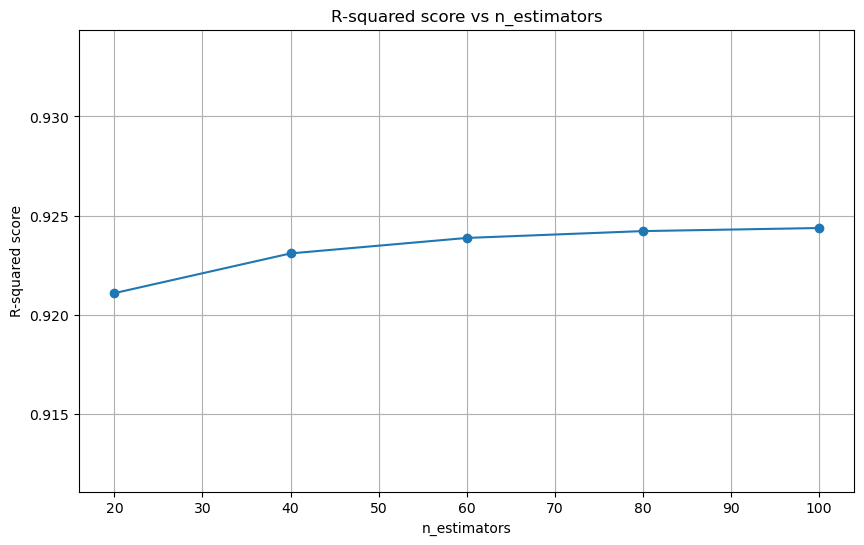

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_scores, marker='o')
plt.title('R-squared score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R-squared score')
plt.grid(True)
plt.ylim(min(r2_scores) - 0.01, max(r2_scores) + 0.01)

plt.show()

<h2>XGBoost<h2>

In [10]:
import xgboost as xgb

In [11]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=20)

In [12]:
%%time

model.fit(X_train, y_train)

CPU times: user 6min 32s, sys: 52 s, total: 7min 24s
Wall time: 1min 3s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred = model.predict(X_test)

In [14]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.9258960430306233


In [15]:
n_estimators_range = range(20, 221, 20)
r2_scores = []

In [16]:
for n_estimators in n_estimators_range:
    model = xgb.XGBRegressor(n_estimators=n_estimators, learning_rate=0.2, max_depth=20)    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print(r2)
    r2_scores.append(r2)

0.9164213630381469
0.9220463946217506
0.9241180289973782
0.9251655316315638
0.9258960430306233
0.9262975963688163
0.9266523441299078
0.9269374864232818
0.9271331041199571
0.9273515683746507
0.927465061802814


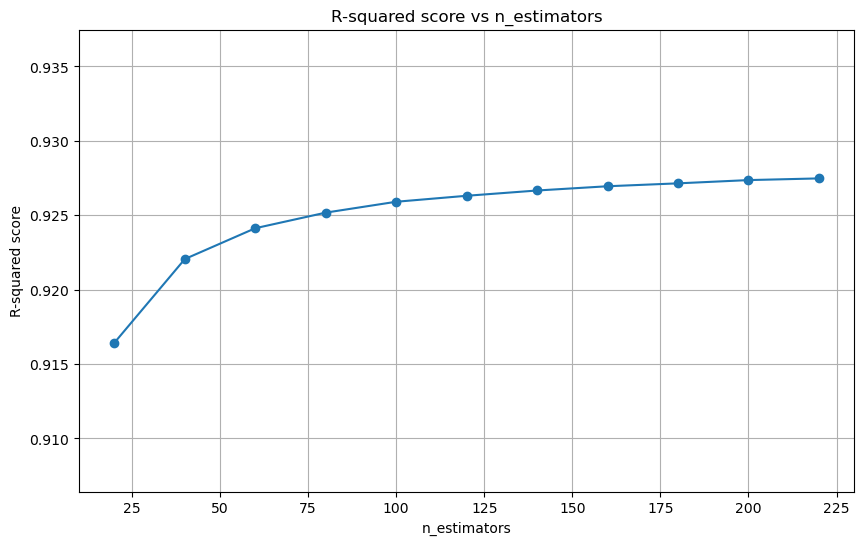

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_scores, marker='o')
plt.title('R-squared score vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R-squared score')
plt.grid(True)
plt.ylim(min(r2_scores) - 0.01, max(r2_scores) + 0.01)

plt.show()

<h2>Neural Network<h2>

In [8]:
from sklearn.neural_network import MLPRegressor

In [9]:
model = MLPRegressor(hidden_layer_sizes=(40, 20), activation='relu', max_iter=300, random_state=1, verbose=1)

In [10]:
%%time

model.fit(X_train, y_train)

Iteration 1, loss = 405415784.19417500
Iteration 2, loss = 101346731.26226471
Iteration 3, loss = 71465585.11233413
Iteration 4, loss = 59358388.46452979
Iteration 5, loss = 51883424.23238201
Iteration 6, loss = 46134115.41845977
Iteration 7, loss = 41745908.29664444
Iteration 8, loss = 38679456.47189789
Iteration 9, loss = 36611550.58882020
Iteration 10, loss = 35173678.59816519
Iteration 11, loss = 34136235.27043305
Iteration 12, loss = 33355647.68437549
Iteration 13, loss = 32751688.35363685
Iteration 14, loss = 32266454.78955125
Iteration 15, loss = 31862645.24184719
Iteration 16, loss = 31508645.41911056
Iteration 17, loss = 31154611.89164839
Iteration 18, loss = 30651849.80212196
Iteration 19, loss = 29989601.61561759
Iteration 20, loss = 29410642.26069830
Iteration 21, loss = 28643049.26731594
Iteration 22, loss = 27851294.37182491
Iteration 23, loss = 27097328.00877279
Iteration 24, loss = 26435838.85157560
Iteration 25, loss = 25770516.47564622
Iteration 26, loss = 25176077.44

Iteration 209, loss = 17721361.99769925
Iteration 210, loss = 17700886.22656853
Iteration 211, loss = 17693189.87471387
Iteration 212, loss = 17688693.09463812
Iteration 213, loss = 17672404.46022997
Iteration 214, loss = 17658913.96370618
Iteration 215, loss = 17647017.85763226
Iteration 216, loss = 17636161.93507615
Iteration 217, loss = 17632022.89927457
Iteration 218, loss = 17613544.82607578
Iteration 219, loss = 17604312.00183354
Iteration 220, loss = 17592498.40879664
Iteration 221, loss = 17579289.49013748
Iteration 222, loss = 17564880.48415272
Iteration 223, loss = 17550856.74681176
Iteration 224, loss = 17546087.72399020
Iteration 225, loss = 17527337.19792434
Iteration 226, loss = 17518528.93251745
Iteration 227, loss = 17507516.13692336
Iteration 228, loss = 17497085.20568121
Iteration 229, loss = 17488336.05607809
Iteration 230, loss = 17473355.01624583
Iteration 231, loss = 17455938.44855421
Iteration 232, loss = 17441606.97610146
Iteration 233, loss = 17425743.98467526


/Users/omar_bahgat/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(40, 20), max_iter=300, random_state=1,
             verbose=1)

In [11]:
y_pred = model.predict(X_test)

In [12]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.9003214583693093
